# 1. PCA using Iris dataset

In [150]:
import numpy as np
import pandas as pd
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [151]:
iris = datasets.load_iris()
labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data,columns=['Sepal length','Sepal width','Petal length','Petal width'])

In [152]:
data.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [153]:
labels.head()

,labels
0,0
1,0
2,0
3,0
4,0


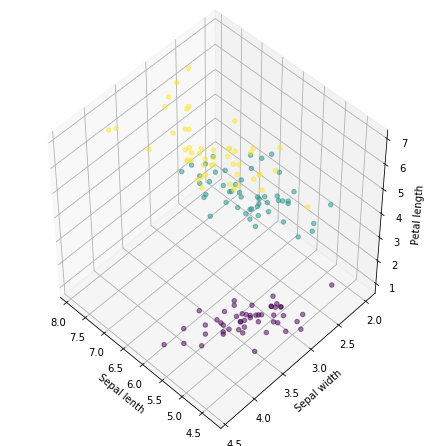

In [154]:
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(data['Sepal length'],data['Sepal width'],data['Petal length'],c=labels['labels'], alpha=0.5)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

## Using Covariance

In [155]:
from sklearn.decomposition import PCA

model = PCA(n_components=4)
pca_features = model.fit_transform(data)
model.explained_variance_  # eigenvalue of cov

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

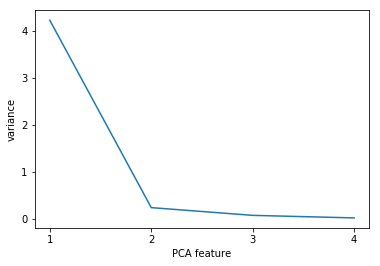

In [156]:
features = range(1, (model.n_components_)+1)
plt.plot(features, model.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [157]:
# SVD
X0 = data - data.mean(axis=0)
U, S, VT = np.linalg.svd(X0)
VT # eigenvector

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102],
       [ 0.58202985, -0.59791083, -0.07623608, -0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

In [158]:
model.components_ # eigenvector

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

PC1 = 0.3613*x1 - 0.0845*x2 + 0.8566*x3 + 0.3582*x4

PC2 = 0.6565*x1 + 0.7301*x2 - 0.1733*x3 - 0.0754*x4

PC3 = ...

PC4 = ...

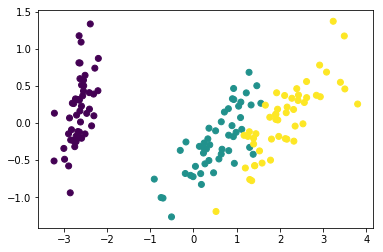

The prop. of total explained variance by 2 PC = 0.9776852063187949


In [29]:
model2 = PCA(n_components=2)
pca_features = model2.fit_transform(data)

xf = pca_features[:,0]
yf = pca_features[:,1]
plt.scatter(xf,yf,c=labels['labels'])
plt.show()

print('The prop. of total explained variance by 2 PC =', sum(model.explained_variance_[0:2])/ sum(model.explained_variance_))

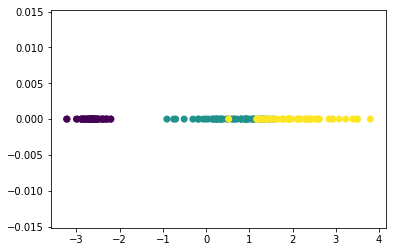

The prop. of total explained variance by 1 PC = 0.924618723201727


In [30]:
model1 = PCA(n_components=1)
pca_features = model1.fit_transform(data)

xf = pca_features[:,0]
yf = len(xf)*[0]
plt.scatter(xf,yf,c=labels['labels'])
plt.show()


print('The prop. of total explained variance by 1 PC =', sum(model.explained_variance_[0:1])/ sum(model.explained_variance_))

## Using Correlation

In [31]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(data)

In [32]:
model = PCA(n_components=4)
pca_features = model.fit_transform(x)
model.explained_variance_ 

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

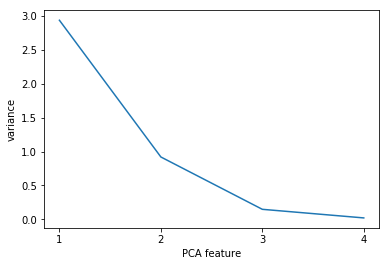

In [33]:
features = range(1, (model.n_components_)+1)
plt.plot(features, model.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [34]:
model.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

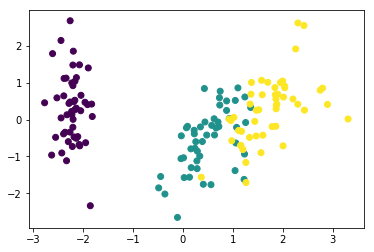

The prop. of total explained variance by 2 PC = 0.9581320720000164


In [35]:
model2 = PCA(n_components=2)
pca_features = model2.fit_transform(x)

xf = pca_features[:,0]
yf = pca_features[:,1]
plt.scatter(xf,yf,c=labels['labels'])
plt.show()

print('The prop. of total explained variance by 2 PC =', sum(model.explained_variance_[0:2])/ sum(model.explained_variance_))

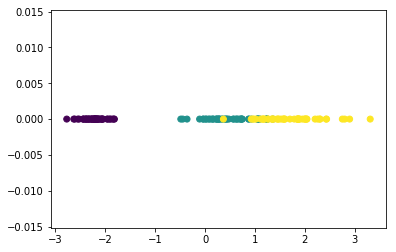

The prop. of total explained variance by 1 PC = 0.7296244541329985


In [36]:
model1 = PCA(n_components=1)
pca_features = model1.fit_transform(x)

xf = pca_features[:,0]
yf = len(xf)*[0]
plt.scatter(xf,yf,c=labels['labels'])
plt.show()


print('The prop. of total explained variance by 1 PC =', sum(model.explained_variance_[0:1])/ sum(model.explained_variance_))

# 2. Sparse PCA using sklearn

In [37]:
import numpy as np
from sklearn.datasets import make_friedman1
from sklearn.decomposition import SparsePCA, PCA

In [38]:
# Generating p=30 n=200 dataset
X, y = make_friedman1(n_samples=200, n_features=30, random_state=0)

In [39]:
X.shape

(200, 30)

n_components : int,
Number of sparse atoms to extract.

alpha : float,
Sparsity controlling parameter. Higher values lead to sparser components.

ridge_alpha : float,
Amount of ridge shrinkage to apply in order to improve conditioning when calling the transform method.

In [40]:
SPCA_model = SparsePCA(n_components=5, normalize_components=True, alpha=0.5, random_state=0)
SPCA_model.fit(X)
SZ = SPCA_model.transform(X)
# most values in the components_ are zero (sparsity)
np.mean(SPCA_model.components_ == 0) 

0.8866666666666667

In [41]:
SPCA_model = SparsePCA(n_components=5, normalize_components=True, alpha=1, random_state=0)
SPCA_model.fit(X)
SZ = SPCA_model.transform(X)
# most values in the components_ are zero (sparsity)
np.mean(SPCA_model.components_ == 0) 

0.9666666666666667

## PCA vs. SPCA

In [42]:
PCA_model = PCA(n_components=5)
PCA_model.fit(X)
Z = PCA_model.transform(X)

In [43]:
# Check the first 2 loadings from PCA and SPCA.
print(PCA_model.components_[0:2])
print(SPCA_model.components_[0:2])

[[-0.14139129 -0.24695594  0.09080675 -0.11534191  0.12738665 -0.11595503
   0.05348215 -0.19764325  0.00390923  0.02346963  0.01471818 -0.25381583
   0.38178778  0.194578    0.2839312  -0.0730398   0.08182308  0.01724768
   0.16863972 -0.02696111  0.11568202  0.03519364 -0.18025853  0.30703899
   0.31866585  0.28106827  0.2531522  -0.26031239 -0.02730234  0.02022437]
 [ 0.20948696 -0.13142101  0.24388176  0.17084134  0.27411014  0.20680321
   0.04928917 -0.03884992 -0.15257285 -0.00542258 -0.14653626  0.31103771
  -0.24212291  0.10902566  0.02796243 -0.07497005  0.08931086  0.13169308
   0.31640018  0.0820386   0.22020064  0.2095719  -0.18228011 -0.24031605
   0.20937779  0.17516541 -0.28790925 -0.07894681 -0.01374276 -0.17469299]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]


Z = -0.14139x1 - 0.2469x2 + ...... + 0.0202x30

SZ = x13

# 3. FA using iris dataset

In [69]:
from numpy as np
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=2, random_state=0, )
data_transformed = transformer.fit_transform(data)
#coefficients of F1, F2
data_transformed 

array([[-1.32761727e+00, -5.61310764e-01],
       [-1.33763854e+00, -2.79764907e-03],
       [-1.40281483e+00,  3.06349492e-01],
       [-1.30104274e+00,  7.18826835e-01],
       [-1.33342439e+00, -3.64588985e-01],
       [-1.14667134e+00, -1.04228193e+00],
       [-1.35307178e+00,  5.74473558e-01],
       [-1.27940722e+00, -2.33129838e-01],
       [-1.36530876e+00,  1.12229944e+00],
       [-1.28651978e+00,  4.72301660e-02],
       [-1.25777170e+00, -1.18508651e+00],
       [-1.23700429e+00,  2.91772867e-01],
       [-1.34543381e+00,  2.06818259e-01],
       [-1.53401771e+00,  1.05544473e+00],
       [-1.39682229e+00, -2.38993243e+00],
       [-1.23819458e+00, -1.98969103e+00],
       [-1.36091949e+00, -1.37946760e+00],
       [-1.32540156e+00, -5.50623528e-01],
       [-1.13192081e+00, -1.69029724e+00],
       [-1.27252223e+00, -5.37071207e-01],
       [-1.14996491e+00, -9.45749580e-01],
       [-1.27007895e+00, -5.02802605e-01],
       [-1.56999078e+00,  1.79437924e-01],
       [-1.

In [79]:
# Covariance Matrix
Sigma = transformer.get_covariance()
Sigma

array([[ 0.68126364, -0.04284633,  1.26570894,  0.51508603],
       [-0.04284633,  0.1886676 , -0.32646537, -0.14309414],
       [ 1.26570894, -0.32646537,  3.09553209,  1.2866423 ],
       [ 0.51508603, -0.14309414,  1.2866423 ,  0.57713221]])

In [80]:
# factor loadings
L = transformer.components_
L.T

array([[ 0.72746132, -0.36874572],
       [-0.18085204, -0.24059   ],
       [ 1.75790224,  0.03551754],
       [ 0.73100458,  0.04526567]])

In [81]:
Sigma - np.dot(L.T, L)

array([[0.01609026, 0.        , 0.        , 0.        ],
       [0.        , 0.09807659, 0.        , 0.        ],
       [0.        , 0.        , 0.00405033, 0.        ],
       [0.        , 0.        , 0.        , 0.04071555]])

# 4. FA (using Admission Dataset)

In [192]:
df = pd.read_csv("C:/Users/Danah/Desktop/graduate-admissions/Admission_Predict.csv",sep = ",")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [193]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
None


In [198]:
df = df.drop(['Serial No.', 'Chance of Admit '] , axis=1)

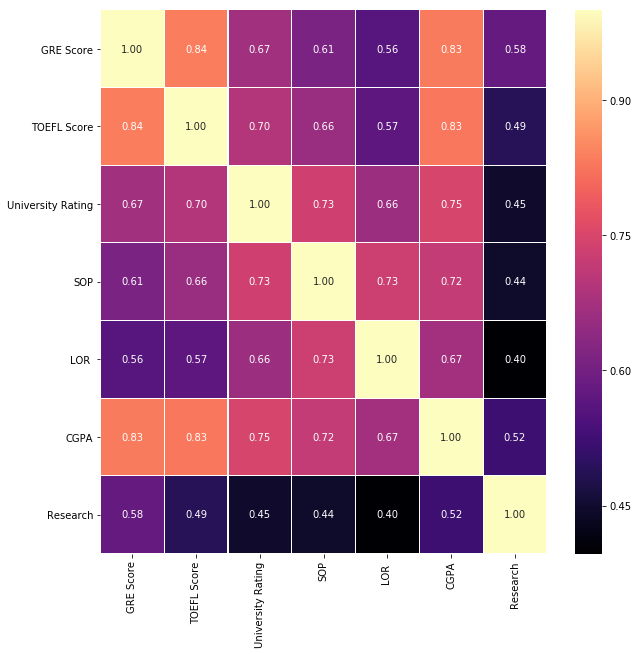

In [199]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

## Scree plot

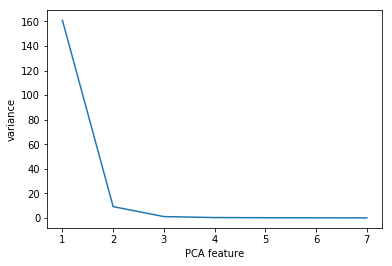

In [200]:
from sklearn.decomposition import PCA
model = PCA(n_components=7, whiten= True )  # whitten = normalize
pca_features = model.fit_transform(df)
features = range(1, (model.n_components_)+1)
plt.plot(features, model.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [201]:
transformer = FactorAnalysis(n_components=2, random_state=0)
data_transformed = transformer.fit_transform(df)
#coefficients of F1, F2
data_transformed 

array([[-1.76573526e+00, -3.80999815e-03],
       [-6.30999226e-01,  3.35711847e-01],
       [ 1.17833145e-01, -5.31724320e-01],
       [-4.20466671e-01, -6.89182562e-01],
       [ 3.24255184e-01, -1.22428721e+00],
       [-1.17485080e+00,  2.30930730e-01],
       [-3.18848800e-01, -6.26040089e-01],
       [ 7.92693468e-01, -2.02564695e-02],
       [ 1.32761936e+00, -9.32131095e-01],
       [-4.80071800e-01, -7.68730877e-01],
       [-6.44685292e-01, -7.53672878e-01],
       [-8.93889893e-01,  2.11185116e-01],
       [-9.83480431e-01,  1.93163609e-01],
       [ 7.94936309e-01,  8.39445117e-01],
       [ 5.11941475e-01, -1.65300956e-01],
       [ 2.70586177e-01, -2.71418310e-01],
       [-1.68823791e-02,  1.16964771e-01],
       [-1.42024008e-01, -4.61027632e-01],
       [-1.15232547e-01,  1.52149579e-01],
       [ 1.13574244e+00,  1.04899170e+00],
       [ 4.47938810e-01, -6.03375140e-01],
       [-6.44451763e-01, -1.22503848e+00],
       [-1.06808830e+00,  1.46553767e+00],
       [-1.

In [203]:
# factor loadings
L = transformer.components_
L.T

array([[-11.39883661,  -0.56233513],
       [ -5.158813  ,   1.20319274],
       [ -0.79544631,   0.54617874],
       [ -0.64853171,   0.59755999],
       [ -0.52653296,   0.49412256],
       [ -0.50838144,   0.18466405],
       [ -0.29218924,   0.04324684]])

## Factor rotation (using Varimax method)

In [204]:
def varimax(Phi, gamma = 1, q = 20, tol = 1e-6):
    from numpy import eye, asarray, dot, sum, diag
    from numpy.linalg import svd
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in range(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d/d_old < tol: break
    return dot(Phi, R)

In [205]:
RotatedL = varimax(L.T)
RotatedL

C:\Users\Danah\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


array([[-1.14126933e+01,  1.13783979e-02],
       [-5.09180820e+00,  1.46099746e+00],
       [-7.66985063e-01,  5.85474136e-01],
       [-6.17673341e-01,  6.29405248e-01],
       [-5.01028482e-01,  5.19965894e-01],
       [-4.98455923e-01,  2.09986168e-01],
       [-2.89645880e-01,  5.78800864e-02]])

Text(0.5, 1.0, 'After Rotation')

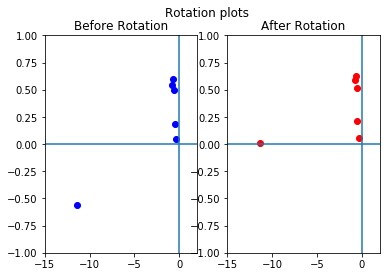

In [206]:
fig = plt.figure()
fig.suptitle('Rotation plots')  

plt.subplot(121)
plt.xlim(-15, 2)
plt.ylim(-1, 1)
plt.plot(L.T[:,0], L.T[:,1], 'bo')
plt.axvline(x=0)
plt.axhline(y=0)
plt.title("Before Rotation")

plt.subplot(122)
plt.xlim(-15, 2)
plt.ylim(-1, 1)
plt.plot(RotatedL[:,0], RotatedL[:,1], 'ro')
plt.axvline(x=0)
plt.axhline(y=0)
plt.title("After Rotation")

## Naming Factors

In [207]:
RotatedL

array([[-1.14126933e+01,  1.13783979e-02],
       [-5.09180820e+00,  1.46099746e+00],
       [-7.66985063e-01,  5.85474136e-01],
       [-6.17673341e-01,  6.29405248e-01],
       [-5.01028482e-01,  5.19965894e-01],
       [-4.98455923e-01,  2.09986168e-01],
       [-2.89645880e-01,  5.78800864e-02]])

Factor 1 = variable 2(TOEFL Score), 3(University Rating), 6(CGPA) => quantitative indicator

Factor 2 = variable 7(Research), 4(SOP),  5(LOR) => quaㅣtitative indicator

etc = variable 1(GRE Score)